# DAV 6150 Module 11

-by Group Manling Yang, Xiaojia He, Qi Sun

***
## Introduction

The purpose of this study is to build decision trees and random forest models to predict mushroom veil color. This dataset is comprised of 8124 observations and includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). 

<img src="https://raw.githubusercontent.com/susanqisun/DAV-6150/master/assignments/picture/024%20Mushroom.jpg">


For this study, there are 22 independent variables and one dependent variable.

**Independent variables:**

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. ring-number: none=n,one=o,two=t
18. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
19. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
20. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
21. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
22. poisonous: edible=e, p=poisonous

**Dependent variable:**

**veil-color**: brown=n,orange=o,white=w,yellow=y. 

Reference: https://archive.ics.uci.edu/ml/datasets/mushroom

In [ ]:
# Importing required libraries.

import pandas as pd
import numpy as np

import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)


***
## Step 1: Load data into the data frame from GitHub

After reading the dataset from Github

`.head()` returns the first 5 rows of the dataset. 

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/mandy941/DAV-Data-Science/master/Decision%20Tree%20versus%20Random%20Forest%20Performance/M11_Data.csv',
                  names = ['poisonous','cap_shape','cap_surface','cap_color','bruises','odor','gill_attachment','gill_spacing','gill_size','gill_color',
                          'stalk_shape','stalk_root','stalk_surface_above_ring','stalk_surface_below_ring','stalk_color_above_ring','stalk_color_below_ring',
                          'veil_type','veil_color','ring_number','ring_type','spore_print_color','population','habitat'])
data.head()

,poisonous,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


***
## Step 2: Exploratory Data Analysis

In this case, the steps of Exploratory Data Analysis consist of:
>1. Data exploration
2. Update label values
3. Visualize categorical columns
4. Check the relationship between independent variables and the dependent variable



### 1. Data exploration:
`.shape` returns the number of rows by the number of columns for the dataset.

`.describe()` summarizes the count, mean, standard deviation, min, and max for numeric variables. 

`.dtypes` identifies the Data Types.

`.nunique()` returns the number of unique values for each variable.

`.isnull().sum()` checks missing values for each column.

`.count()` returns the count for each variable.

In [ ]:
df = data.copy()
# check the shape for the dataframe
df.shape

(8124, 23)

In [ ]:
# statistical summary of numeric variables:
df.describe().T

,count,unique,top,freq
poisonous,8124,2,e,4208
cap_shape,8124,6,x,3656
cap_surface,8124,4,y,3244
cap_color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill_attachment,8124,2,f,7914
gill_spacing,8124,2,c,6812
gill_size,8124,2,b,5612
gill_color,8124,12,b,1728


In [ ]:
#Identify the Data Types
df_info = pd.DataFrame(df.dtypes,columns=['Dtype'])

#Identify the unique values
df_info['Nunique'] = df.nunique()

#check missing values for each column
df_info['MissingValues']=df.isnull().sum()

# Identify the count for each variable
df_info['Count']=df.count()

# Identify the zero values for each variable
df_info['ZeroValues']=(df==0).sum()

# how many '?' values
df_info['?Values']=(df=='?').sum()

df_info

,Dtype,Nunique,MissingValues,Count,ZeroValues,?Values
poisonous,object,2,0,8124,0,0
cap_shape,object,6,0,8124,0,0
cap_surface,object,4,0,8124,0,0
cap_color,object,10,0,8124,0,0
bruises,object,2,0,8124,0,0
odor,object,9,0,8124,0,0
gill_attachment,object,2,0,8124,0,0
gill_spacing,object,2,0,8124,0,0
gill_size,object,2,0,8124,0,0
gill_color,object,12,0,8124,0,0


1. There are 8124 observations and 23 attributes in the mushroom dataset. 
2. This data set contains 2480 '?' values in column 'stalk-root'. Consider the '?' values almost take up 25%, we'll handle them later.
3. All variables are categorical. The dependent variable 'veil_color' has 4 unique values. 
4. The feature 'veil_type' has only one value. We'll delete 'veil_type' since it will not affect the classification.

### 2. Update label values

The label values in this data set are using letters. We'll re-label the values to get more details.

In [ ]:
categorical_names = '''poisonous=p,edible=e
bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s
fibrous=f,grooves=g,scaly=y,smooth=s
brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
bruises=t,no=f
almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
attached=a,descending=d,free=f,notched=n
close=c,crowded=w,distant=d
broad=b,narrow=n
black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
enlarging=e,tapering=t
bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,value?=?
fibrous=f,scaly=y,silky=k,smooth=s
fibrous=f,scaly=y,silky=k,smooth=s
brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
partial=p,universal=u
brown=n,orange=o,white=w,yellow=y
none=n,one=o,two=t
cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d'''.split('\n')
for j, names in enumerate(categorical_names):
    values = names.split(',')
    values = dict([(x.split('=')[1], x.split('=')[0]) for x in values])
    df.iloc[:,j] = np.array(list(map(lambda x: values[x], df.iloc[:,j])))
    
df.head()

,poisonous,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


### 3. Visualize variables

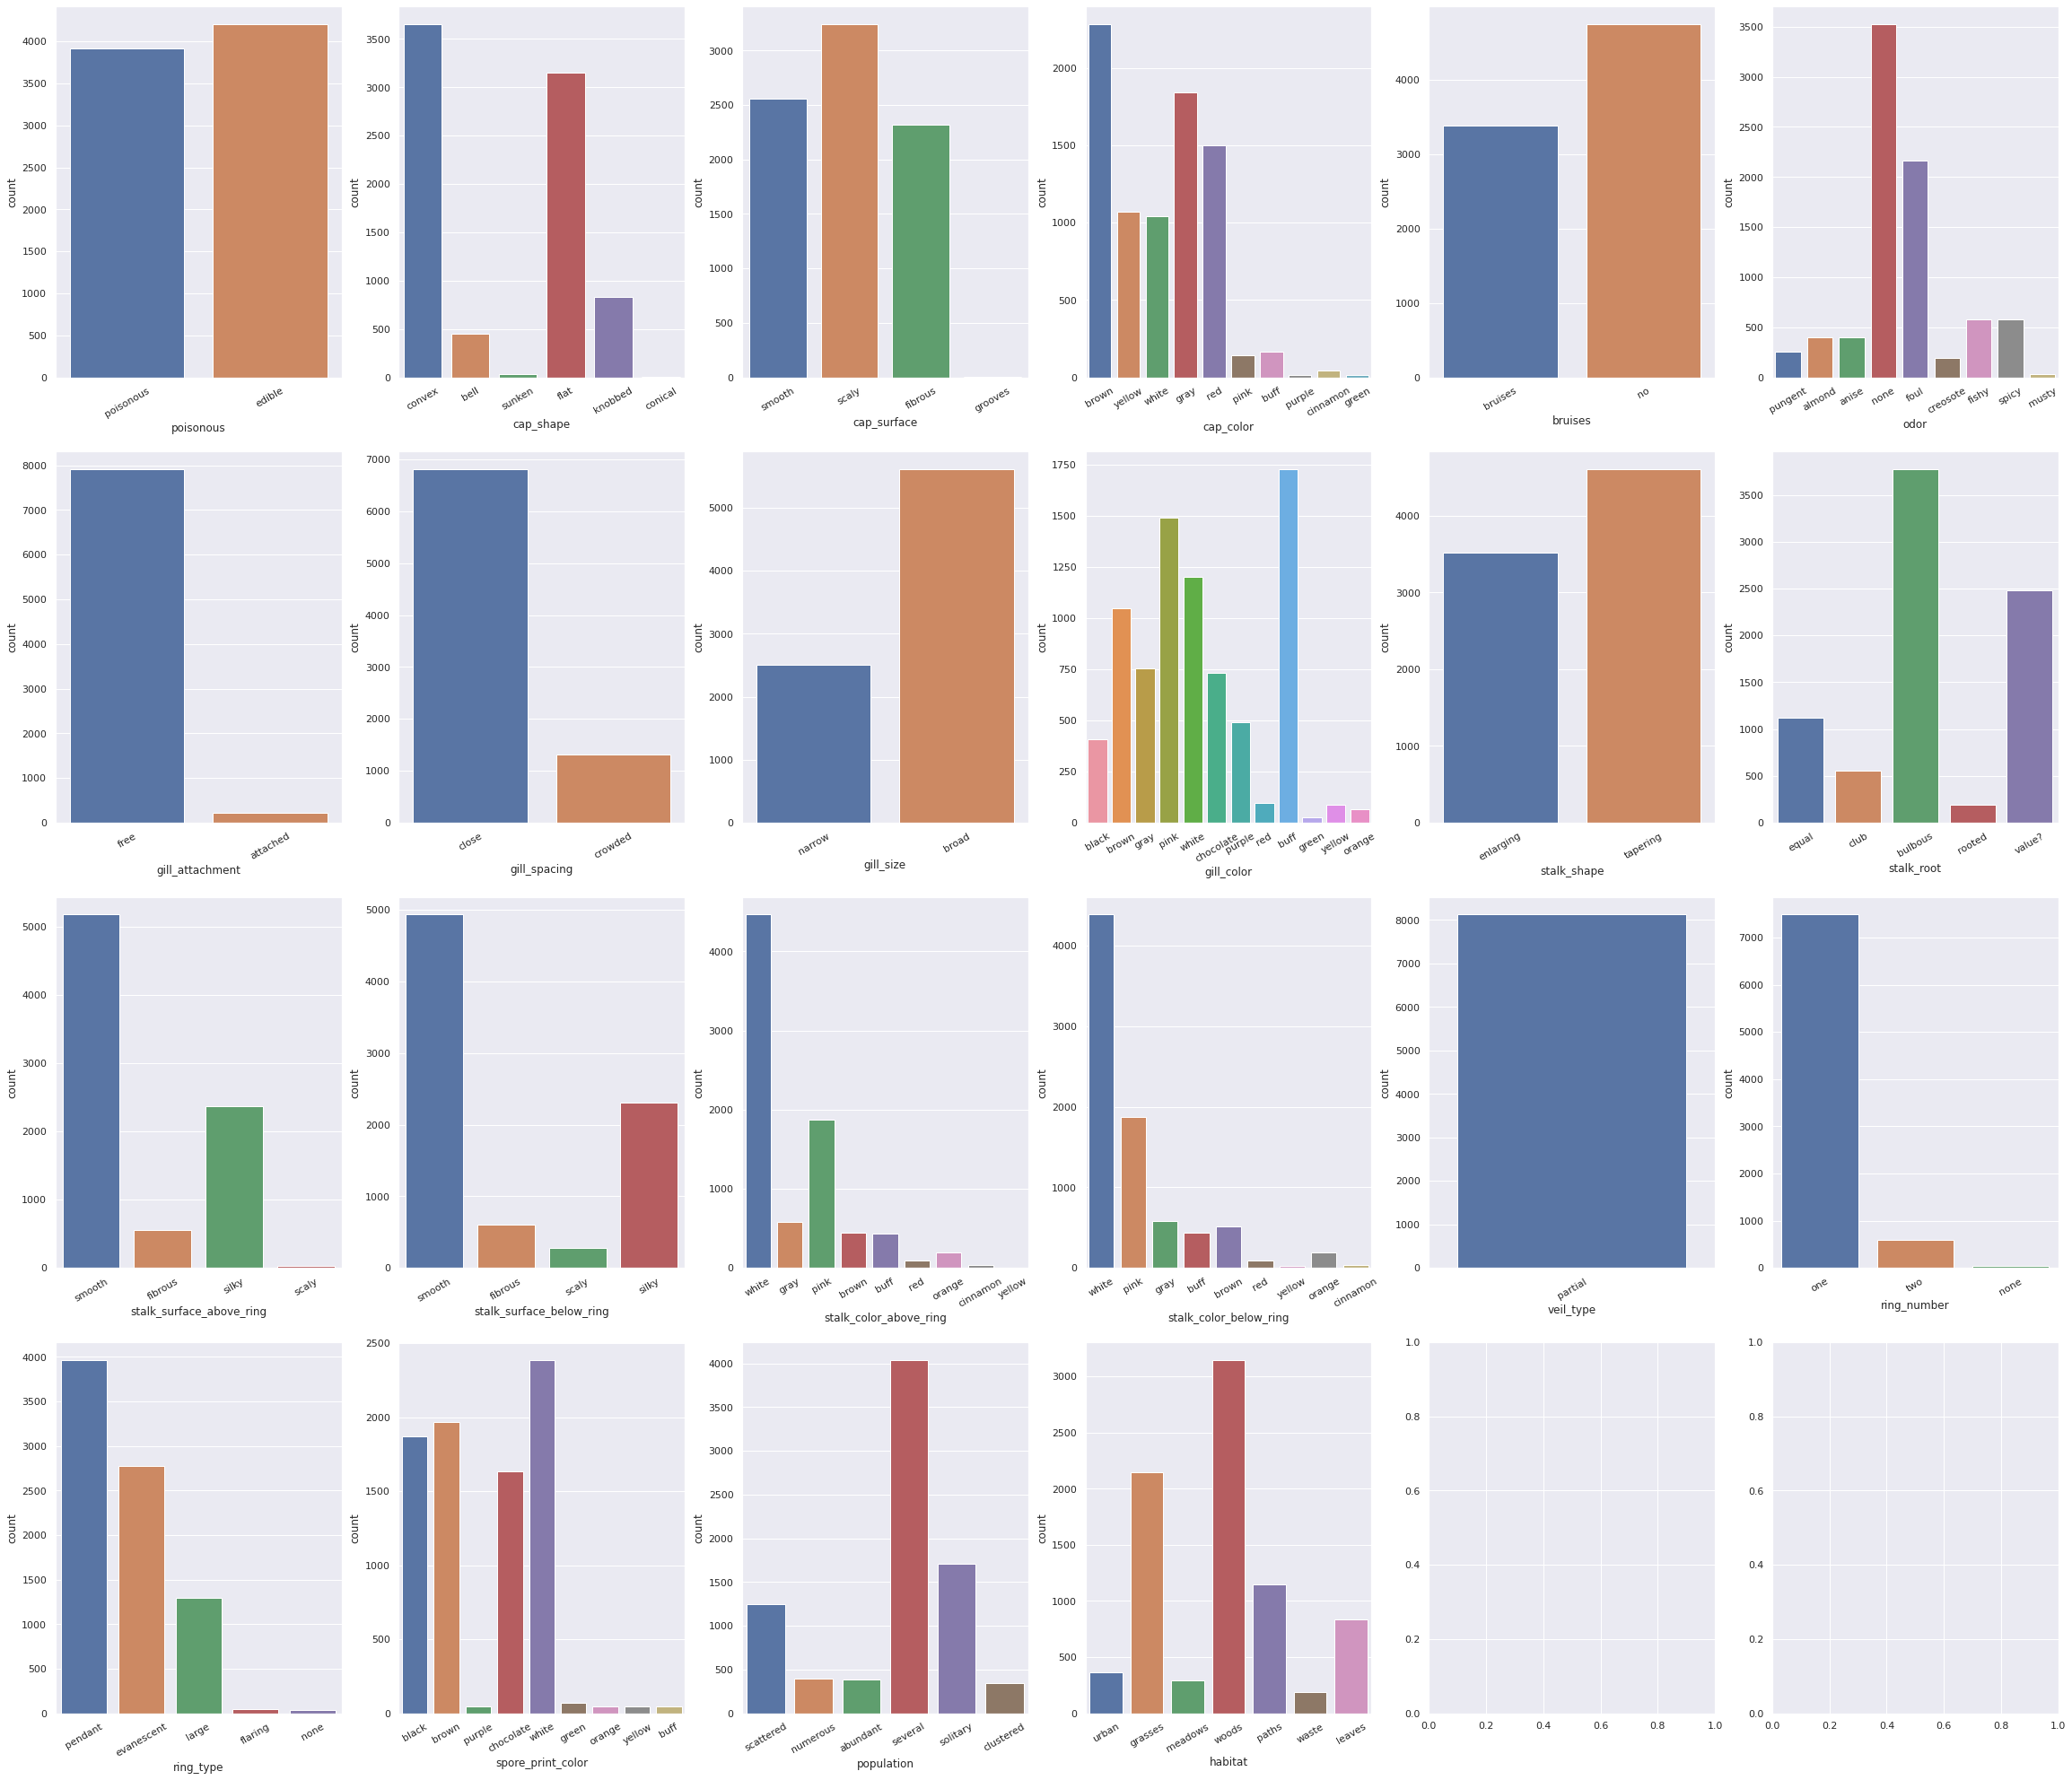

In [ ]:
# create the bar chart for each categorical columns
categorical_columns = ['poisonous', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 
                        'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 
                        'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 
                        'stalk_color_below_ring', 'veil_type','ring_number', 'ring_type', 
                        'spore_print_color', 'population', 'habitat']

fig, ax = plt.subplots(4, 6, figsize=(40, 35))
for variable, subplot in zip(categorical_columns, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(30)

1. Most of the mushrooms have a free grill attachment, closed gill spacing, broad gill size, bulbous stalk root, one ring number, smooth style for stalk surface above and below the ring, pendant ring type, black spore print color, and several populations. 
2. The data of mushrooms' poisonous situations, bruises, and stalk shape are in balance. 
3. Black, brown, chocolate, and white are the main spore print color in the dataset. 
4. All the veil type of mushrooms are partial. 

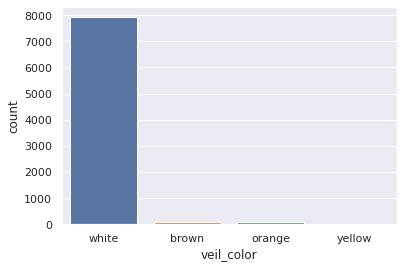

In [ ]:
# plot dependent variable
sns.countplot(df['veil_color'])

In [ ]:
# what percentage of the mushroom veil color? 
veil_color_white = len(df[df['veil_color']=='white'])
veil_color_brown = len(df[df['veil_color']=='brown'])
veil_color_orange = len(df[df['veil_color']=='orange'])
veil_color_yellow = len(df[df['veil_color']=='yellow'])

pct_white = veil_color_white/(veil_color_white+veil_color_brown+veil_color_orange+veil_color_yellow)
print("Percentage of white veil is", pct_white*100)

pct_brown = veil_color_brown/(veil_color_white+veil_color_brown+veil_color_orange+veil_color_yellow)
print("Percentage of brown veil is", pct_brown*100)

pct_orange = veil_color_orange/(veil_color_white+veil_color_brown+veil_color_orange+veil_color_yellow)
print("Percentage of orange veil is", pct_orange*100)

pct_yellow = veil_color_yellow/(veil_color_white+veil_color_brown+veil_color_orange+veil_color_yellow)
print("Percentage of yellow veil is", pct_yellow*100)

Percentage of white veil is 97.53815854258985
Percentage of brown veil is 1.1816838995568686
Percentage of orange veil is 1.1816838995568686
Percentage of yellow veil is 0.09847365829640572


According to the dependent variable analysis, most of the mushrooms' samples have white veil color. There are almost no yellow mushrooms' samples.


### 4. Check the relationship between independent variables and the dependent variable

veil_color,brown,orange,white,yellow
poisonous,,,,
edible,96,96,4016,0
poisonous,0,0,3908,8


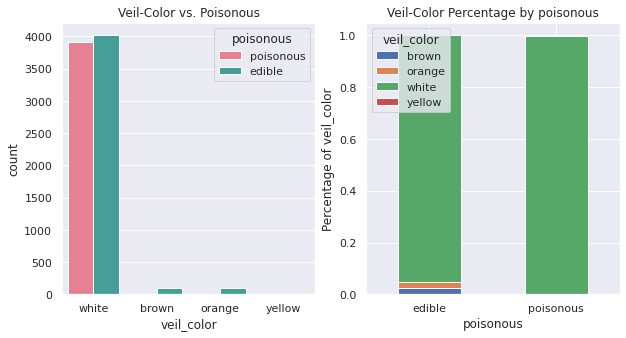

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)

# compare the veil_color difference in poisonous
plt.subplot(121)
sns.countplot(x='veil_color',hue= 'poisonous', data=df, palette = 'husl')
plt.title('Veil-Color vs. Poisonous')

# check the veil_color percentage of poisonous
ax= plt.subplot(122)
p_vc = pd.crosstab(df.poisonous, df.veil_color)
p_vc.div(p_vc .sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax)
plt.title('Veil-Color Percentage by poisonous')
plt.xlabel('poisonous')
plt.xticks(rotation=0)
plt.ylabel('Percentage of veil_color')

p_vc

1. Most of the mushrooms are white whatever is poisonous or edible.
2. Poisonous may appear to be relatively more “predictive” of the response variable because there are equal to or more than half types of poisonous contain more than one type of veil colors. 

veil_color,brown,orange,white,yellow
cap_shape,,,,
bell,24,24,402,2
conical,0,0,2,2
convex,24,24,3608,0
flat,24,24,3102,2
knobbed,24,24,778,2
sunken,0,0,32,0


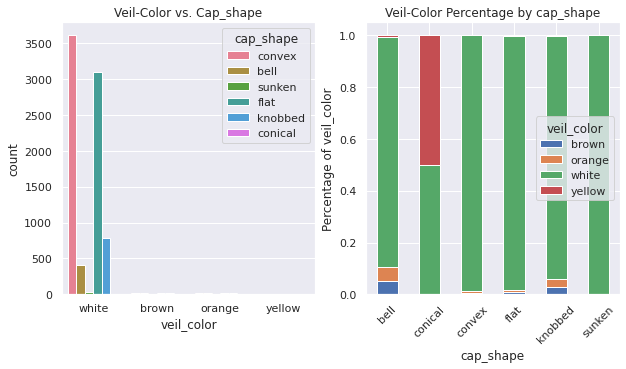

In [ ]:
# compare the veil_color difference in cap_shape
plt.subplot(121)
sns.countplot(x='veil_color',hue= 'cap_shape', data=df, palette = 'husl')
plt.title('Veil-Color vs. Cap_shape')

# check the veil_color percentage of cap_shape
ax= plt.subplot(122)
cs_vc = pd.crosstab(df.cap_shape, df.veil_color)
cs_vc.div(cs_vc .sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax=ax)
plt.title('Veil-Color Percentage by cap_shape')
plt.xlabel('cap_shape')
plt.xticks(rotation=45)
plt.ylabel('Percentage of veil_color')

cs_vc

1. Most of the mushrooms'veil colors are white whatever the cap_shape is.
2. Cap_shape of mushrooms may appear to be relatively more “predictive” of the response variable because there are equal to or more than half types of cap_shape contain more than one type of veil colors. 

veil_color,brown,orange,white,yellow
cap_surface,,,,
fibrous,0,0,2320,0
grooves,0,0,4,0
scaly,0,0,3236,8
smooth,96,96,2364,0


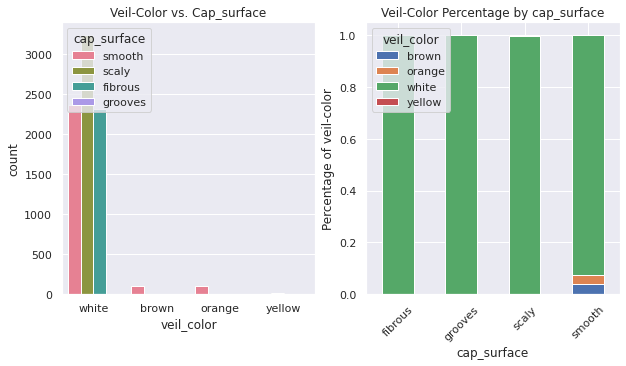

In [ ]:
# compare the veil_color difference in cap_surface
plt.subplot(121)
sns.countplot(x='veil_color',hue= 'cap_surface', data=df, palette = 'husl')
plt.title('Veil-Color vs. Cap_surface')

# check the veil_color percentage of cap_surface
ax= plt.subplot(122)
csu_vc = pd.crosstab(df.cap_surface, df.veil_color)
csu_vc.div(csu_vc .sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax=ax)
plt.title('Veil-Color Percentage by cap_surface')
plt.xlabel('cap_surface')
plt.xticks(rotation=45)
plt.ylabel('Percentage of veil-color')

csu_vc

1. Most of the mushrooms' veil colors are white whatever the cap_surface is.
2. Cap_surface of mushrooms may not appear to be relatively more “predictive” of the response variable because there are less than half types of cap_surface contain more than one type of veil colors. The prediction may be not good.

veil_color,brown,orange,white,yellow
bruises,,,,
bruises,0,0,3376,0
no,96,96,4548,8


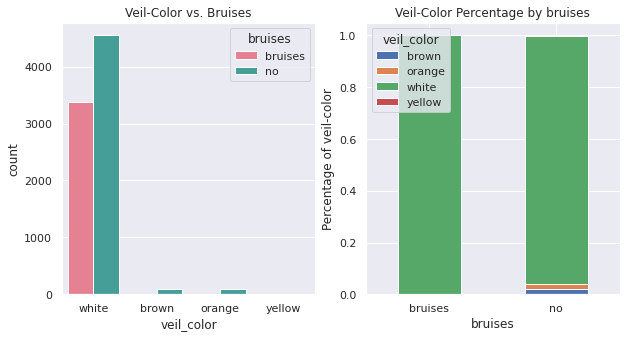

In [ ]:
# compare the veil_color difference in bruises
plt.subplot(121)
sns.countplot(x='veil_color',hue= 'bruises', data=df, palette = 'husl')
plt.title('Veil-Color vs. Bruises')

# check the veil_color percentage of bruises
ax= plt.subplot(122)
b_vc = pd.crosstab(df.bruises, df.veil_color)
b_vc.div(b_vc .sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax=ax)
plt.title('Veil-Color Percentage by bruises')
plt.xlabel('bruises')
plt.xticks(rotation=0)
plt.ylabel('Percentage of veil-color')

b_vc

1. Most of the mushrooms'veil colors are white whatever if bruises.
2. Bruises of mushrooms may appear to be relatively more “predictive” of the response variable because there are equal to or more than half types of bruises contain more than one type of veil colors. 

veil_color,brown,orange,white,yellow
odor,,,,
almond,0,0,400,0
anise,0,0,400,0
creosote,0,0,192,0
fishy,0,0,576,0
foul,0,0,2160,0
musty,0,0,36,0
none,96,96,3328,8
pungent,0,0,256,0
spicy,0,0,576,0


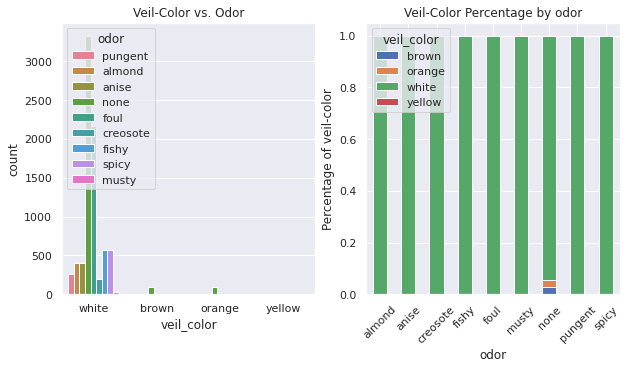

In [ ]:
# compare the veil_color difference in odor
plt.subplot(121)
sns.countplot(x='veil_color',hue= 'odor', data=df,palette = 'husl')
plt.title('Veil-Color vs. Odor')

# check the veil_color percentage of odor
ax= plt.subplot(122)
o_vc = pd.crosstab(df.odor, df.veil_color)
o_vc.div(o_vc .sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax=ax)
plt.title('Veil-Color Percentage by odor')
plt.xlabel('odor')
plt.xticks(rotation=45)
plt.ylabel('Percentage of veil-color')

o_vc


1. Most of the mushrooms' veil colors are white whatever the odor is.
2. The odor of mushrooms may not appear to be relatively more “predictive” of the response variable because there are less than half types of the odor contain more than one type of veil color. The prediction may be not good.

veil_color,brown,orange,white,yellow
gill_attachment,,,,
attached,96,96,18,0
free,0,0,7906,8


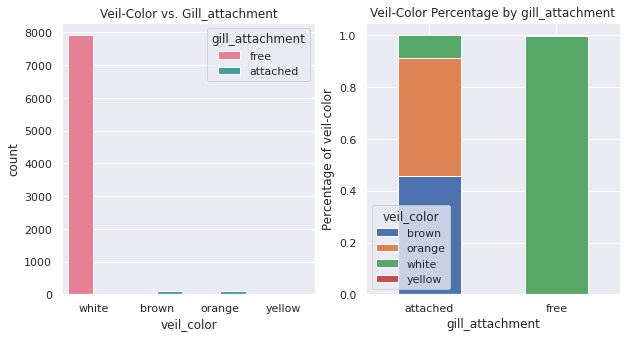

In [ ]:
# compare the veil_color difference in gill_attachment
plt.subplot(121)
sns.countplot(x='veil_color',hue= 'gill_attachment', data=df, palette = 'husl')
plt.title('Veil-Color vs. Gill_attachment')

# check the veil_color percentage of gill_attachment
ax= plt.subplot(122)
ga_vc = pd.crosstab(df.gill_attachment, df.veil_color)
ga_vc.div(ga_vc .sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax=ax)
plt.title('Veil-Color Percentage by gill_attachment')
plt.xlabel('gill_attachment')
plt.xticks(rotation=0)
plt.ylabel('Percentage of veil-color')

ga_vc

1. Most of the mushrooms'veil colors are white when the gill attachment is free. And almost all gill attached is brown or orange of mushrooms' veil colors.
2. Gill attachment of mushrooms may appear to be relatively more “predictive” of the response variable because there are equal to or more than half types of gill attachment contain more than one type of veil color.

veil_color,brown,orange,white,yellow
gill_spacing,,,,
close,96,96,6620,0
crowded,0,0,1304,8


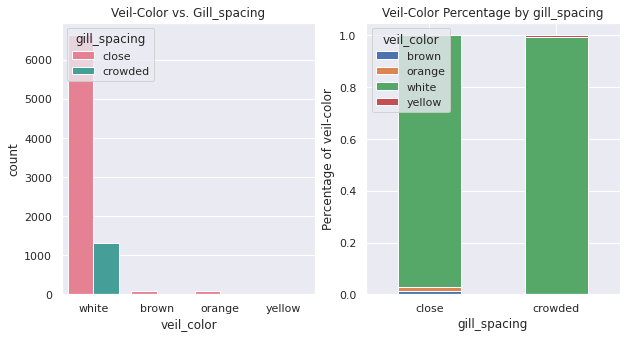

In [ ]:
# compare the veil_color difference in gill_spacing
plt.subplot(121)
sns.countplot(x='veil_color',hue= 'gill_spacing', data=df, palette = 'husl')
plt.title('Veil-Color vs. Gill_spacing')

# check the veil_color percentage of gill_spacing
ax= plt.subplot(122)
gs_vc = pd.crosstab(df.gill_spacing, df.veil_color)
gs_vc.div(gs_vc .sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax=ax)
plt.title('Veil-Color Percentage by gill_spacing')
plt.xlabel('gill_spacing')
plt.xticks(rotation=0)
plt.ylabel('Percentage of veil-color')

gs_vc

1. Most of the mushrooms'veil colors are white when the gill spacing is close. 
2. Gill spacing of mushrooms may appear to be relatively more “predictive” of the response variable because there are equal to or more than half types of gill spacing contain more than one type of veil color.

veil_color,brown,orange,white,yellow
gill_size,,,,
broad,96,96,5420,0
narrow,0,0,2504,8


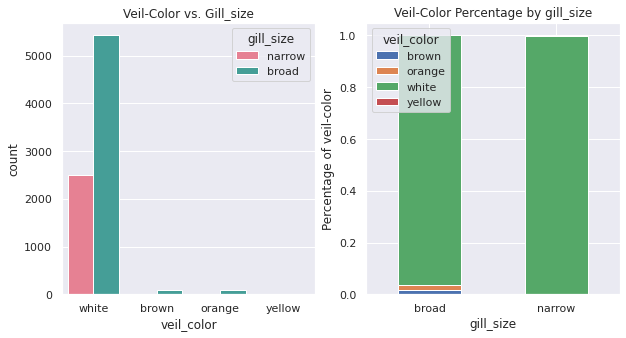

In [ ]:
# compare the veil_color difference in gill_size
plt.subplot(121)
sns.countplot(x='veil_color',hue= 'gill_size', data=df, palette = 'husl')
plt.title('Veil-Color vs. Gill_size')

# check the veil_color percentage of gill_size
ax= plt.subplot(122)
gsize_vc = pd.crosstab( df.gill_size, df.veil_color)
gsize_vc.div(gsize_vc .sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax=ax)
plt.title('Veil-Color Percentage by gill_size')
plt.xlabel('gill_size')
plt.xticks(rotation=0)
plt.ylabel('Percentage of veil-color')

gsize_vc

1. Most of the mushrooms'veil colors are white whatever the gill color is. 
2. Similar to the gill spacing, gill_size of mushrooms may appear to be relatively more “predictive” of the response variable.

veil_color,brown,orange,white,yellow
gill_color,,,,
black,0,0,408,0
brown,32,32,984,0
buff,0,0,1728,0
chocolate,0,0,732,0
gray,0,0,752,0
green,0,0,24,0
orange,32,32,0,0
pink,0,0,1492,0
purple,0,0,492,0


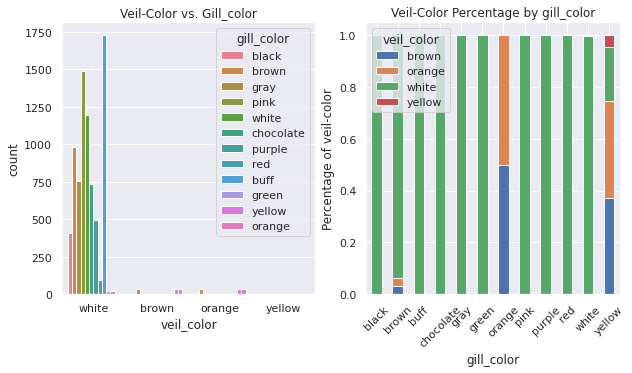

In [ ]:
# compare the veil_color difference in gill_color
plt.subplot(121)
sns.countplot(x='veil_color',hue= 'gill_color', data=df, palette = 'husl')
plt.title('Veil-Color vs. Gill_color')

# check the veil_color percentage of gill_color
ax= plt.subplot(122)
gc_vc = pd.crosstab(df.gill_color, df.veil_color)
gc_vc.div(gc_vc .sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax=ax)
plt.title('Veil-Color Percentage by gill_color')
plt.xlabel('gill_color')
plt.xticks(rotation=45)
plt.ylabel('Percentage of veil-color')

gc_vc

1. Most of the mushrooms'veil colors are white when the gill size is broad. 
2. Although there are less than half types of gill color contain more than one type of veil color, we think it is relatively more “predictive” of the response variable. There is fewer data about brown, orange, and yellow of the mushrooms'veil color. When we discover orange and brown of the mushrooms'veil color take up a large part of the gill color is orange and yellows' column. We think it may be a good feature to predict the independent variable.

veil_color,brown,orange,white,yellow
stalk_shape,,,,
enlarging,96,96,3316,8
tapering,0,0,4608,0


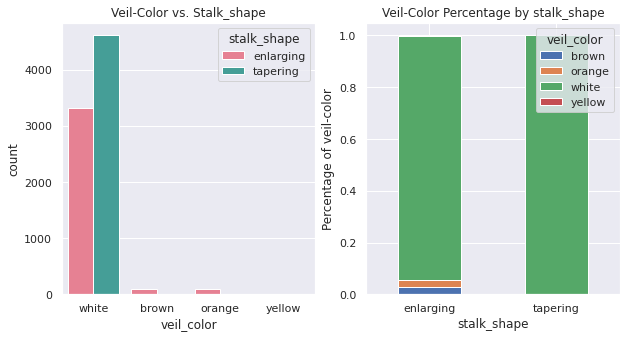

In [ ]:
# compare the veil_color difference in stalk_shape
plt.subplot(121)
sns.countplot(x='veil_color',hue= 'stalk_shape', data=df, palette = 'husl')
plt.title('Veil-Color vs. Stalk_shape')

# check the veil_color percentage of stalk_shape
ax= plt.subplot(122)
ss_vc = pd.crosstab( df.stalk_shape, df.veil_color)
ss_vc.div(ss_vc .sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,ax=ax)
plt.title('Veil-Color Percentage by stalk_shape')
plt.xlabel('stalk_shape')
plt.xticks(rotation=0)
plt.ylabel('Percentage of veil-color')

ss_vc

1. Most of the mushrooms'veil colors are white whatever the stalk shape is. 
2. Similar to the gill spacing, the stalk shape of mushrooms may appear to be relatively more “predictive” of the response variable.

veil_color,brown,orange,white,yellow
stalk_root,,,,
bulbous,0,0,3776,0
club,0,0,548,8
equal,0,0,1120,0
rooted,0,0,192,0
value?,96,96,2288,0


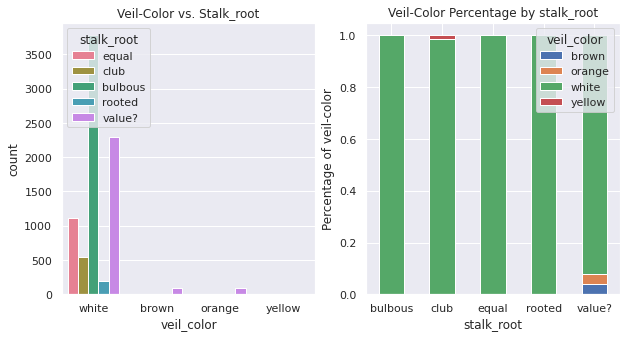

In [ ]:
# compare the veil_color difference in stalk_root
plt.subplot(121)
sns.countplot(x='veil_color',hue= 'stalk_root', data=df, palette = 'husl')
plt.title('Veil-Color vs. Stalk_root')

# check the veil_color percentage of stalk_root
ax= plt.subplot(122)
sr_vc = pd.crosstab( df.stalk_root, df.veil_color)
sr_vc.div(sr_vc .sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax)
plt.title('Veil-Color Percentage by stalk_root')
plt.xlabel('stalk_root')
plt.xticks(rotation=0)
plt.ylabel('Percentage of veil-color')

sr_vc

1. Most of the mushrooms'veil colors are white whatever the stalk root. 
2. Similar to the odor, the stalk root of mushrooms may not appear to be relatively more “predictive” of the response variable. And there are lots of '?' value.

veil_color,brown,orange,white,yellow
stalk_surface_above_ring,,,,
fibrous,0,0,552,0
scaly,0,0,16,8
silky,0,0,2372,0
smooth,96,96,4984,0


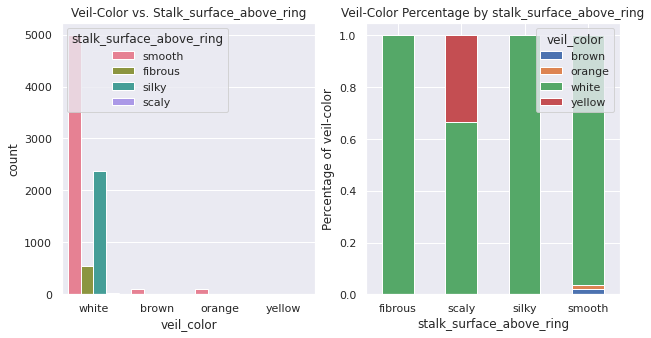

In [ ]:
# compare the veil_color difference in stalk_surface_above_ring
plt.subplot(121)
sns.countplot(x='veil_color',hue= 'stalk_surface_above_ring', data=df, palette = 'husl')
plt.title('Veil-Color vs. Stalk_surface_above_ring')

# check the veil_color percentage of stalk_surface_above_ring
ax= plt.subplot(122)
ssar_vc = pd.crosstab( df.stalk_surface_above_ring, df.veil_color)
ssar_vc.div(ssar_vc .sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax)
plt.title('Veil-Color Percentage by stalk_surface_above_ring')
plt.xlabel('stalk_surface_above_ring')
plt.xticks(rotation=0)
plt.ylabel('Percentage of veil-color')

ssar_vc

1. Most of the mushrooms'veil colors are white whatever the stalk_surface_above_ring is. 
2. Similar to the gill spacing, the stalk_surface_above_ring of mushrooms may appear to be relatively more “predictive” of the response variable.

veil_color,brown,orange,white,yellow
stalk_surface_below_ring,,,,
fibrous,0,0,600,0
scaly,0,0,276,8
silky,0,0,2304,0
smooth,96,96,4744,0


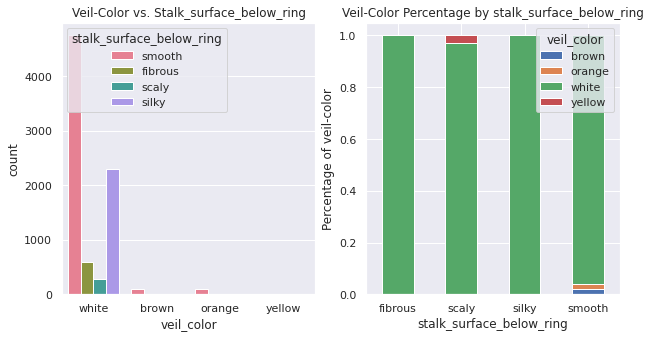

In [ ]:
# compare the veil_color difference in stalk_surface_below_ring
plt.subplot(121)
sns.countplot(x='veil_color',hue= 'stalk_surface_below_ring', data=df, palette = 'husl')
plt.title('Veil-Color vs. Stalk_surface_below_ring')

# check the veil_color percentage of stalk_surface_below_ring
ax= plt.subplot(122)
ssbr_vc = pd.crosstab(df.stalk_surface_below_ring, df.veil_color)
ssbr_vc.div(ssbr_vc .sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax)
plt.title('Veil-Color Percentage by stalk_surface_below_ring')
plt.xlabel('stalk_surface_below_ring')
plt.xticks(rotation=0)
plt.ylabel('Percentage of veil-color')

ssbr_vc

1. Most of the mushrooms'veil colors are white whatever the stalk_surface_below_ring is. 
2. Similar to the gill spacing, the stalk_surface_below_ring of mushrooms may appear to be relatively more “predictive” of the response variable.

veil_color,brown,orange,white,yellow
stalk_color_above_ring,,,,
brown,0,0,448,0
buff,0,0,432,0
cinnamon,0,0,36,0
gray,0,0,576,0
orange,96,96,0,0
pink,0,0,1872,0
red,0,0,96,0
white,0,0,4464,0
yellow,0,0,0,8


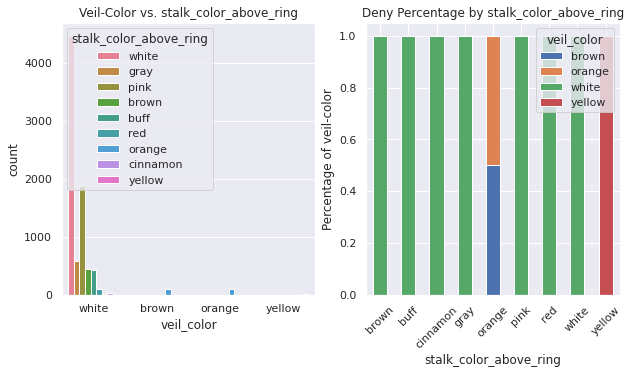

In [ ]:
# compare the veil_color difference in stalk_color_above_ring
plt.subplot(121)
sns.countplot(x='veil_color',hue= 'stalk_color_above_ring', data=df, palette = 'husl')
plt.title('Veil-Color vs. stalk_color_above_ring')

# check the veil_color percentage of stalk_color_above_ring
ax= plt.subplot(122)
scar_vc = pd.crosstab(df.stalk_color_above_ring, df.veil_color)
scar_vc.div(scar_vc .sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax)
plt.title('Deny Percentage by stalk_color_above_ring')
plt.xlabel('stalk_color_above_ring')
plt.xticks(rotation=45)
plt.ylabel('Percentage of veil-color')

scar_vc

1. Most of the mushrooms'veil colors are white whatever the  stalk_color_above_ring is. 
2. Similar to the gill_color, the stalk_color_above_ring of mushrooms may appear to be relatively more “predictive” of the response variable.

veil_color,brown,orange,white,yellow
stalk_color_below_ring,,,,
brown,0,0,512,0
buff,0,0,432,0
cinnamon,0,0,36,0
gray,0,0,576,0
orange,96,96,0,0
pink,0,0,1872,0
red,0,0,96,0
white,0,0,4384,0
yellow,0,0,16,8


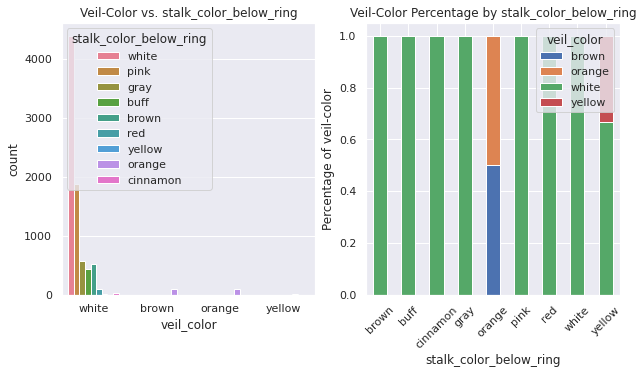

In [ ]:
# compare the veil_color difference in stalk_color_below_ring
plt.subplot(121)
sns.countplot(x='veil_color',hue= 'stalk_color_below_ring', data=df, palette = 'husl')
plt.title('Veil-Color vs. stalk_color_below_ring')

# check the veil_color percentage of stalk_color_below_ring
ax= plt.subplot(122)
scbr_vc = pd.crosstab(df.stalk_color_below_ring, df.veil_color)
scbr_vc.div(scbr_vc .sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax)
plt.title('Veil-Color Percentage by stalk_color_below_ring')
plt.xlabel('stalk_color_below_ring')
plt.xticks(rotation=45)
plt.ylabel('Percentage of veil-color')

scbr_vc

1. Most of the mushrooms'veil colors are white whatever the  stalk_color_below_ring is. 
2. Similar to the gill_color, the stalk_color_below_ring of mushrooms may appear to be relatively more “predictive” of the response variable.

veil_color,brown,orange,white,yellow
veil_type,,,,
partial,96,96,7924,8


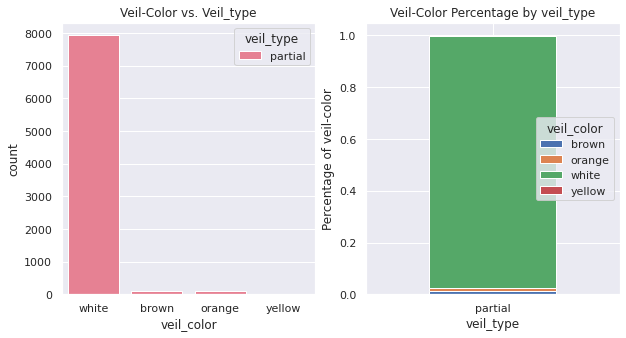

In [ ]:
# compare the veil_color difference in veil_type
plt.subplot(121)
sns.countplot(x='veil_color',hue= 'veil_type', data=df, palette = 'husl')
plt.title('Veil-Color vs. Veil_type')

# check the veil_color percentage of veil_type
ax= plt.subplot(122)
vt_vc = pd.crosstab(df.veil_type, df.veil_color)
vt_vc.div(vt_vc .sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax)
plt.title('Veil-Color Percentage by veil_type')
plt.xlabel('veil_type')
plt.xticks(rotation=0)
plt.ylabel('Percentage of veil-color')

vt_vc

1. Most of the mushrooms'veil colors are white whatever the veil_type is. 
2. The veil_type of mushrooms may not appear to be relatively more “predictive” of the response variable because all the mushrooms are partial.

veil_color,brown,orange,white,yellow
ring_number,,,,
none,0,0,36,0
one,96,96,7288,8
two,0,0,600,0


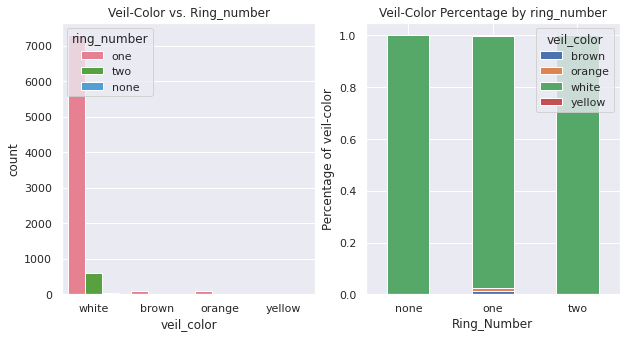

In [ ]:
# compare the veil_color difference in ring_number
plt.subplot(121)
sns.countplot(x='veil_color',hue= 'ring_number', data=df, palette = 'husl')
plt.title('Veil-Color vs. Ring_number')

# check the veil_color percentage of ring_number
ax= plt.subplot(122)
rn_vc = pd.crosstab(df.ring_number, df.veil_color)
rn_vc.div(rn_vc .sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax)
plt.title('Veil-Color Percentage by ring_number')
plt.xlabel('Ring_Number')
plt.xticks(rotation=0)
plt.ylabel('Percentage of veil-color')

rn_vc

1. Most of the mushrooms'veil colors are white whatever the ring_number is. 
2. Similar to the odor, the ring_number of mushrooms may not appear to be relatively more “predictive” of the response variable.

veil_color,brown,orange,white,yellow
ring_type,,,,
evanescent,0,0,2768,8
flaring,0,0,48,0
large,0,0,1296,0
none,0,0,36,0
pendant,96,96,3776,0


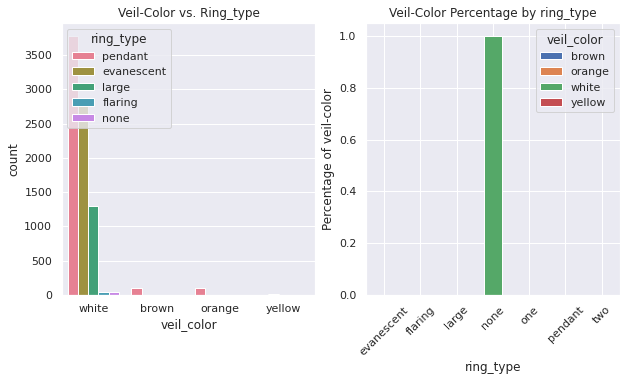

In [ ]:
# compare the veil_color difference in ring_type
plt.subplot(121)
sns.countplot(x='veil_color',hue= 'ring_type', data=df, palette = 'husl')
plt.title('Veil-Color vs. Ring_type')

# check the veil_color percentage of ring_type
ax= plt.subplot(122)
rt_vc = pd.crosstab(df.ring_type, df.veil_color)
rt_vc.div(rn_vc .sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax)
plt.title('Veil-Color Percentage by ring_type')
plt.xlabel('ring_type')
plt.xticks(rotation=45)
plt.ylabel('Percentage of veil-color')

rt_vc

1. Most of the mushrooms'veil colors are white whatever the ring_type is. 
2. Similar to the odor, the ring_type of mushrooms may not appear to be relatively more “predictive” of the response variable.

veil_color,brown,orange,white,yellow
spore_print_color,,,,
black,0,0,1872,0
brown,24,24,1920,0
buff,24,24,0,0
chocolate,0,0,1632,0
green,0,0,72,0
orange,24,24,0,0
purple,0,0,48,0
white,0,0,2380,8
yellow,24,24,0,0


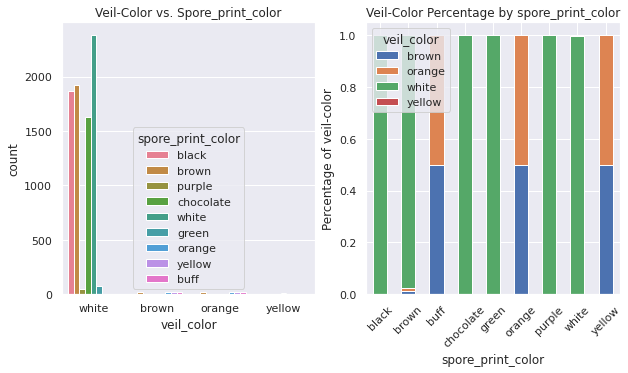

In [ ]:
# compare the veil_color difference in spore_print_color
plt.subplot(121)
sns.countplot(x='veil_color',hue= 'spore_print_color', data=df, palette = 'husl')
plt.title('Veil-Color vs. Spore_print_color')

# check the veil_color percentage of spore_print_color
ax= plt.subplot(122)

spc_vc = pd.crosstab(df.spore_print_color, df.veil_color)
spc_vc.div(spc_vc .sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax)
plt.title('Veil-Color Percentage by spore_print_color')
plt.xlabel('spore_print_color')
plt.xticks(rotation=45)
plt.ylabel('Percentage of veil-color')

spc_vc

1. Most of the mushrooms'veil colors are white whatever the  spore_print_color is. 
2. Similar to the gill_color, the spore_print_color of mushrooms may appear to be relatively more “predictive” of the response variable.

veil_color,brown,orange,white,yellow
population,,,,
abundant,0,0,384,0
clustered,48,48,236,8
numerous,0,0,400,0
scattered,0,0,1248,0
several,48,48,3944,0
solitary,0,0,1712,0


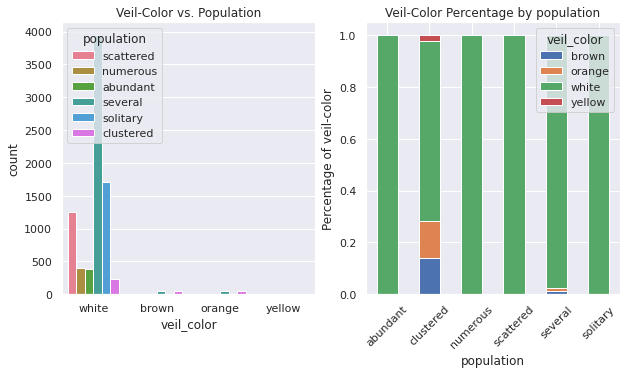

In [ ]:
# compare the veil_color difference in population
plt.subplot(121)
sns.countplot(x='veil_color',hue= 'population', data=df, palette = 'husl')
plt.title('Veil-Color vs. Population')

# check the veil_color percentage of population
ax= plt.subplot(122)

p_vc = pd.crosstab(df.population, df.veil_color)
p_vc.div(p_vc .sum(1).astype(float), axis=0).plot(kind='bar', stacked=True
                                                  , ax=ax)
plt.title('Veil-Color Percentage by population')
plt.xlabel('population')
plt.xticks(rotation=45)
plt.ylabel('Percentage of veil-color')

p_vc

1. Most of the mushrooms'veil colors are white whatever the population is. 
2. Similar to the gill_color, the population of mushrooms may appear to be relatively more “predictive” of the response variable.

veil_color,brown,orange,white,yellow
habitat,,,,
grasses,0,0,2148,0
leaves,96,96,632,8
meadows,0,0,292,0
paths,0,0,1144,0
urban,0,0,368,0
waste,0,0,192,0
woods,0,0,3148,0


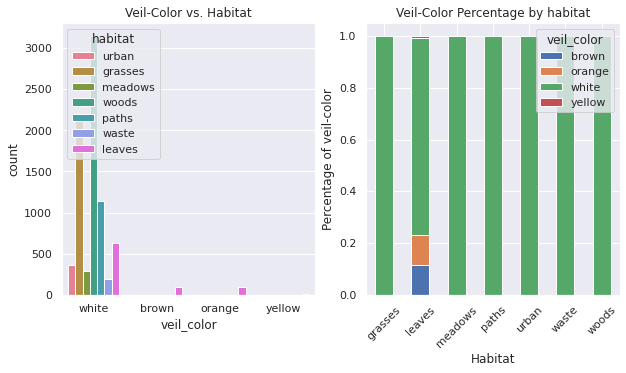

In [ ]:
# compare the veil_color difference in habitat
plt.subplot(121)
sns.countplot(x='veil_color',hue= 'habitat', data=df, palette = 'husl')
plt.title('Veil-Color vs. Habitat')

# check the veil_color percentage of habitat
ax= plt.subplot(122)
h_vc = pd.crosstab(df.habitat, df.veil_color)
h_vc.div(h_vc .sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax)
plt.title('Veil-Color Percentage by habitat')
plt.xlabel('Habitat')
plt.xticks(rotation=45)
plt.ylabel('Percentage of veil-color')

h_vc

1. Most of the mushrooms'veil colors are white whatever the habitat is. 
2. Similar to the gill_color, the habitat of mushrooms may appear to be relatively more “predictive” of the response variable.

***
## Step 3: Data Preparation

### 1. Handle the '?' value:

The feature 'veil-color' has '?' values. We would like to rename the '?' value as 'unknown' instead of deleting them.



In [ ]:
df02=df.copy()

df02['stalk_root'].value_counts()


bulbous    3776
value?     2480
equal      1120
club        556
rooted      192
Name: stalk_root, dtype: int64

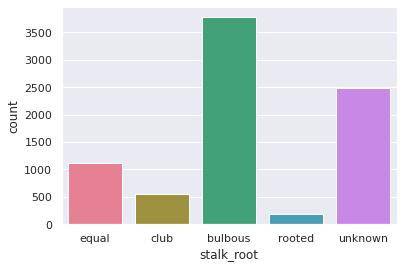

In [ ]:
df02['stalk_root'] = df02['stalk_root'].replace({'value?':'unknown'})
sns.countplot(x='stalk_root',data=df02, palette = 'husl')


### 2. Drop the column of 'veil_type'

Since the variable 'veil_type' has only one value, we'll remomve it from the data set.

In [ ]:
df03 = df02.drop(["veil_type"],axis=1)

df03.columns

Index(['poisonous', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_color', 'ring_number', 'ring_type',
       'spore_print_color', 'population', 'habitat'],
      dtype='object')

Now there are 21 independent variables for this study.

### 3. Convert categorical variable into dummy variables

In [ ]:
independent_variables = ['poisonous', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring','ring_number', 'ring_type',
       'spore_print_color', 'population', 'habitat']

df_dummy = pd.get_dummies(df03, columns=independent_variables)

In [ ]:
print("check the column names:", df_dummy.columns.tolist())
print("\n")
print("total number of columns: ", len(df_dummy.columns.tolist()))

check the column names: ['veil_color', 'poisonous_edible', 'poisonous_poisonous', 'cap_shape_bell', 'cap_shape_conical', 'cap_shape_convex', 'cap_shape_flat', 'cap_shape_knobbed', 'cap_shape_sunken', 'cap_surface_fibrous', 'cap_surface_grooves', 'cap_surface_scaly', 'cap_surface_smooth', 'cap_color_brown', 'cap_color_buff', 'cap_color_cinnamon', 'cap_color_gray', 'cap_color_green', 'cap_color_pink', 'cap_color_purple', 'cap_color_red', 'cap_color_white', 'cap_color_yellow', 'bruises_bruises', 'bruises_no', 'odor_almond', 'odor_anise', 'odor_creosote', 'odor_fishy', 'odor_foul', 'odor_musty', 'odor_none', 'odor_pungent', 'odor_spicy', 'gill_attachment_attached', 'gill_attachment_free', 'gill_spacing_close', 'gill_spacing_crowded', 'gill_size_broad', 'gill_size_narrow', 'gill_color_black', 'gill_color_brown', 'gill_color_buff', 'gill_color_chocolate', 'gill_color_gray', 'gill_color_green', 'gill_color_orange', 'gill_color_pink', 'gill_color_purple', 'gill_color_red', 'gill_color_white', 

### 4. Label the dependent variable

In [ ]:
df_dummy['veil_color'].value_counts()

white     7924
brown       96
orange      96
yellow       8
Name: veil_color, dtype: int64

In [ ]:
df_dummy['veil_color'].replace({"white": 1, "brown": 2,
                               "orange": 3, "yellow": 0}, inplace=True)

In [ ]:
df_dummy['veil_color'].value_counts()

1    7924
3      96
2      96
0       8
Name: veil_color, dtype: int64

***
## Step4. Prepped Data Review

In [ ]:
df_final = df_dummy.copy()

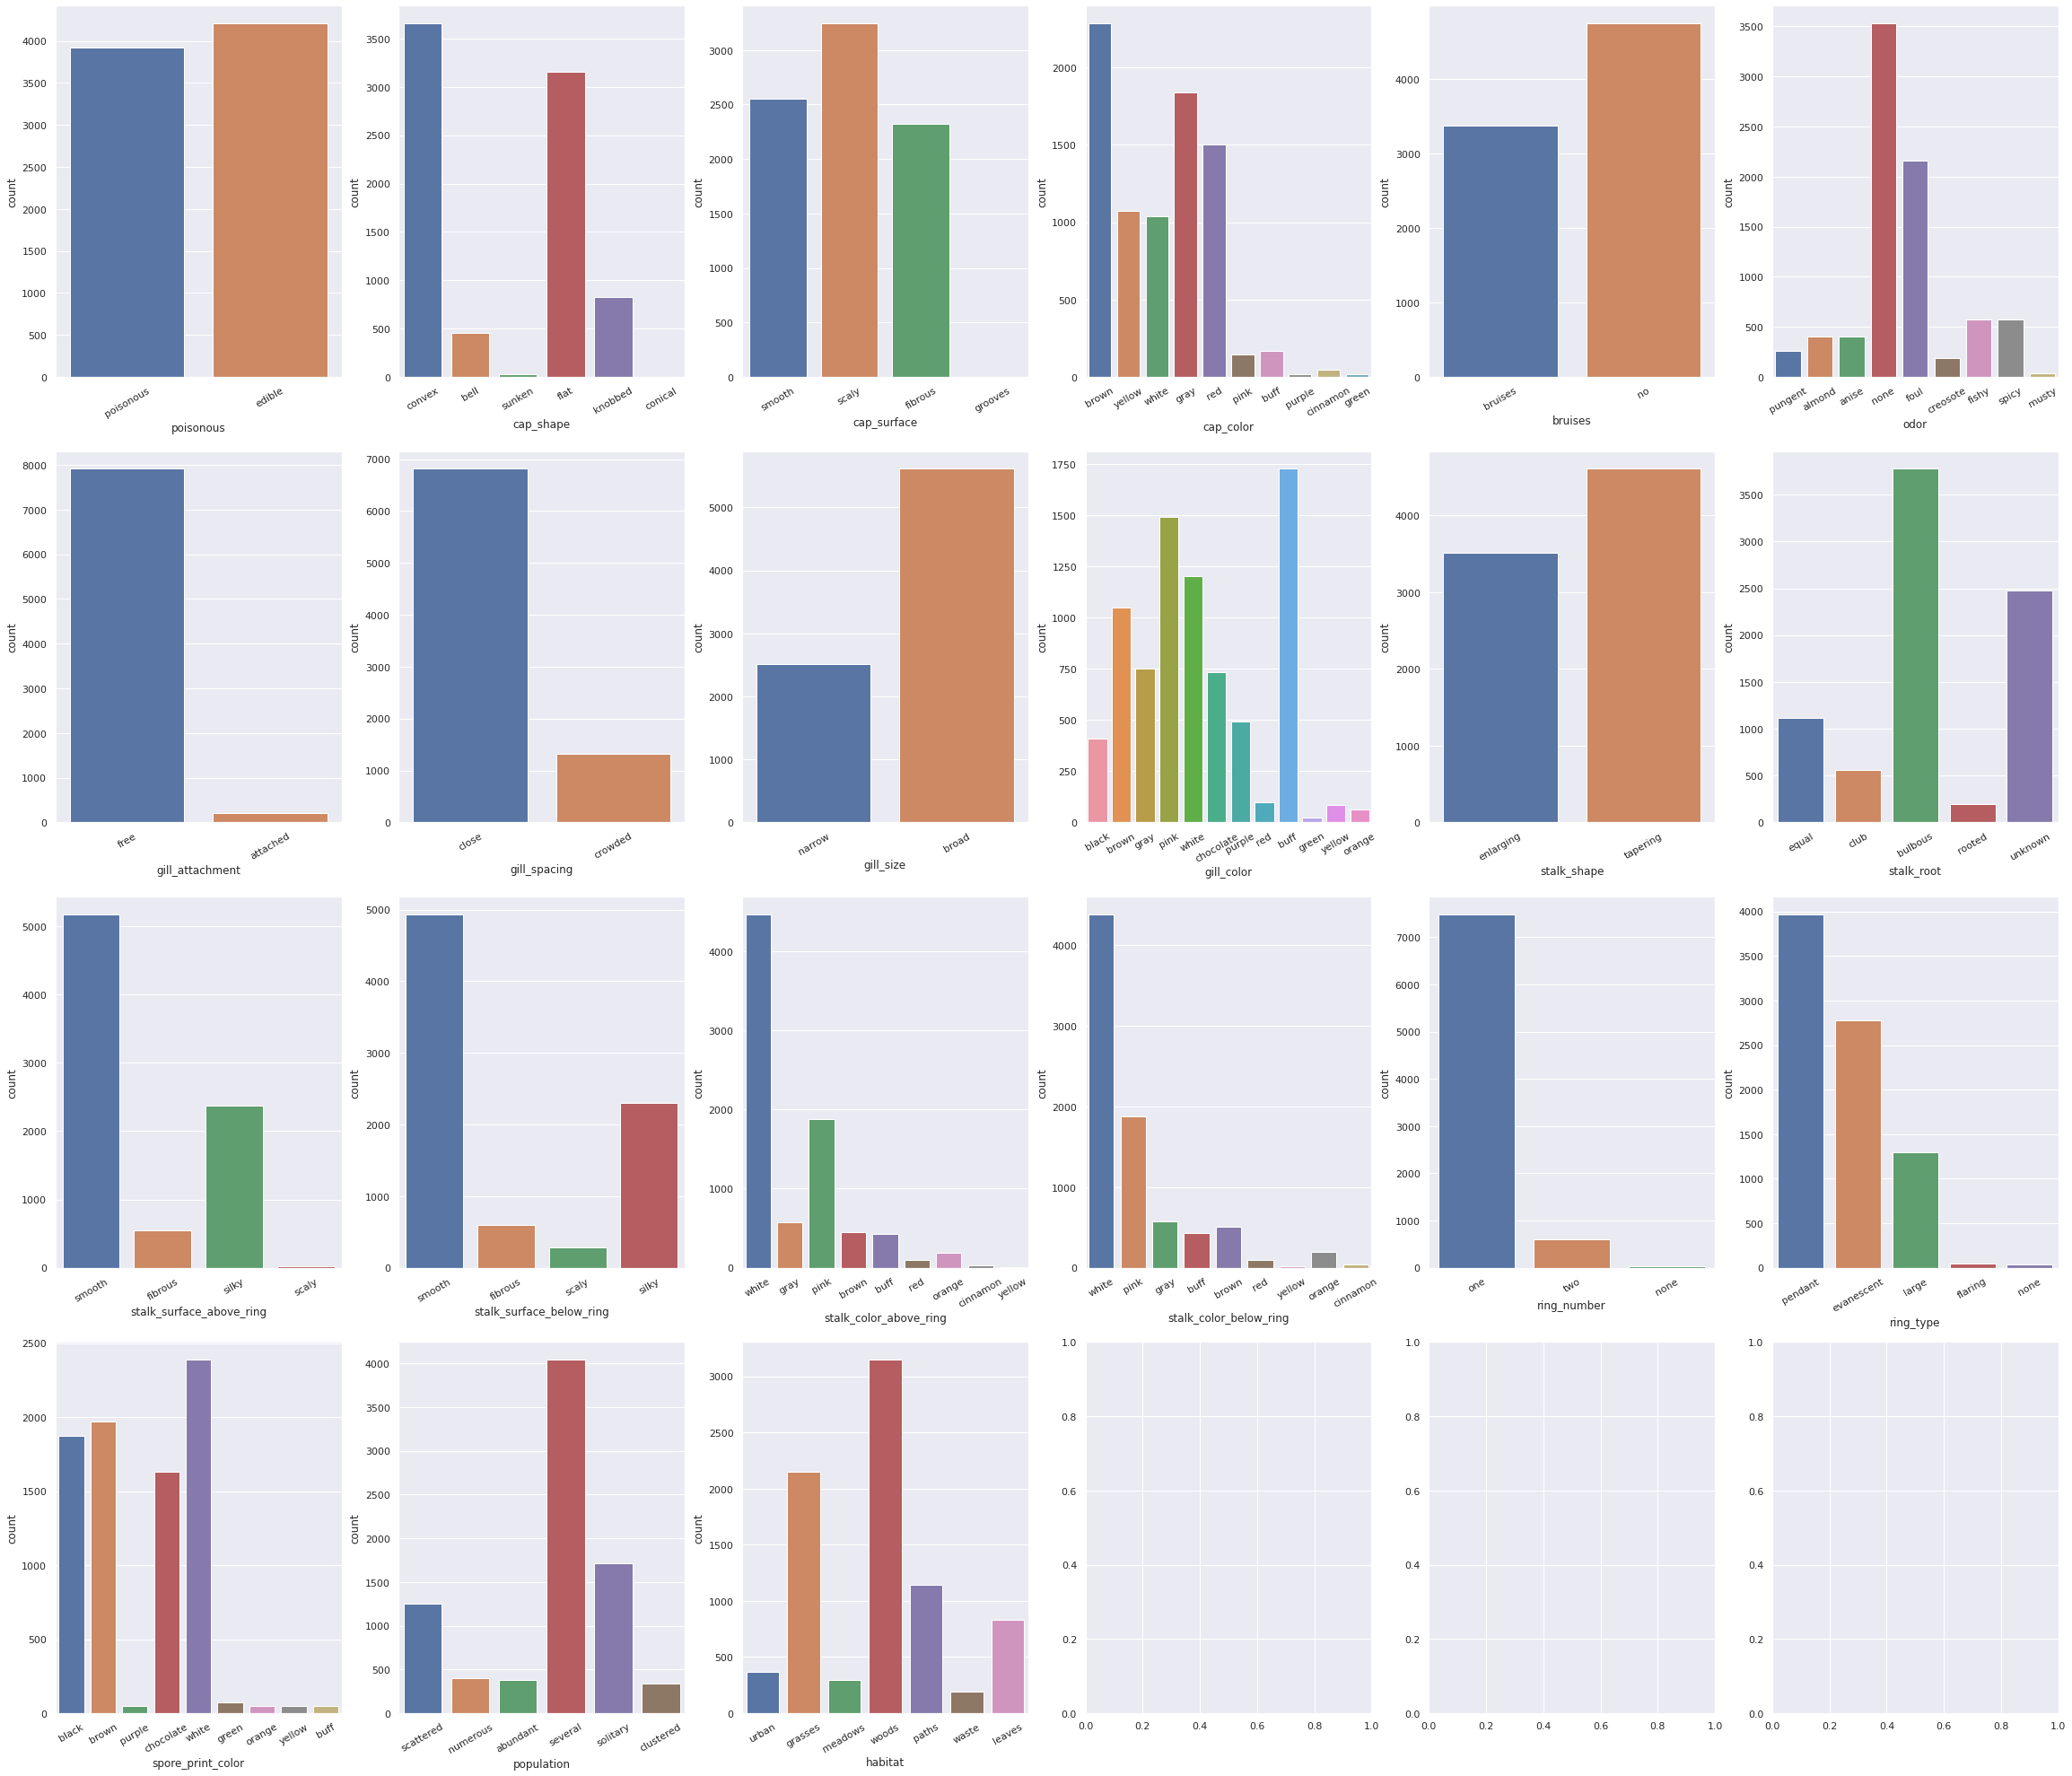

In [ ]:
# create the bar chart for each categorical columns
categorical_columns = ['poisonous', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 
                        'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 
                        'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 
                        'stalk_color_below_ring','ring_number', 'ring_type', 
                        'spore_print_color', 'population', 'habitat']
fig, ax = plt.subplots(4, 6, figsize=(40, 35))
for variable, subplot in zip(categorical_columns, ax.flatten()):
    sns.countplot(df03[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(30)

1. Most of the columns do not have changed except the stalk_root and veil_type.
2. In the stalk root of the mushroom, the unknown type is the top 2.  
3. The veil_type column has been deleted.

veil_color,brown,orange,white,yellow
stalk_root,,,,
bulbous,0,0,3776,0
club,0,0,548,8
equal,0,0,1120,0
rooted,0,0,192,0
unknown,96,96,2288,0


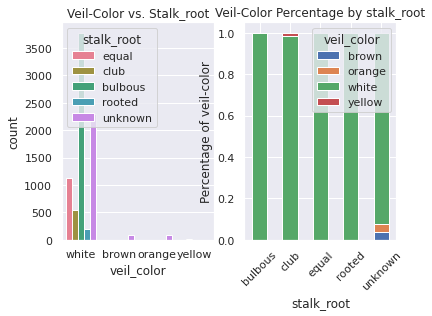

In [ ]:
# compare the veil_color difference in stalk_root
plt.subplot(121)
sns.countplot(x='veil_color',hue= 'stalk_root', data=df03, palette = 'husl')
plt.title('Veil-Color vs. Stalk_root')

# check the veil_color percentage of stalk_root
ax= plt.subplot(122)
sr_vc = pd.crosstab( df03.stalk_root, df03.veil_color)
sr_vc.div(sr_vc .sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax)
plt.title('Veil-Color Percentage by stalk_root')
plt.xlabel('stalk_root')
plt.xticks(rotation=45)
plt.ylabel('Percentage of veil-color')

sr_vc

We can see the there are 3 types of mushroom's veil color in stalk_root_unknown, it may appear to be relatively more “predictive” of the response variable.

***
## Step 5. Decision Tree + Random Forest Modeling and Select Models 

We'll use two different sets of features to create models. Also, we'll tune the hyperparameters for these models and test their performance.

Models can have many hyperparameters and finding the best combination of parameters can be treated as a search problem. Two best strategies for Hyperparameter tuning are:
* GridSearchCV
* RandomizedSearchCV

For Decision Tree models, we'll use `RandomizedSearchCV` to tune the hyperparameters. 

For Random Forest models, we'll use `GridSearchCV` to tune the hyperparameters.

Since the speed of tuning the hyperparameters, not all of them can be adjusted. We'll adjust the following set of hyperparameters for Decision Tree models:

{"max_depth": [3,4,5,6,7,8], 
              'max_features': ['auto', 'sqrt', 'log2'],
              "min_samples_leaf": randint(1, 9), 
              'min_samples_split': [2, 4, 6],
              "criterion": ["gini", "entropy"]} 

We'll adjust the following set of hyperparameters for Random Forest models:

{'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,4,5,6,7,8],
    'min_samples_split': [2, 4, 6]}


### 5.1 Split data into training and testing subsets

Before doing feature selection,we'll split data into training and testing subsets by using the `train_test_split` function. The test_size=0.3 inside the function indicates the percentage of the data that should be held over for testing. It’s 70/30, 30% of the data for testing.

In [ ]:
from sklearn.model_selection import train_test_split

# Create X and y
X = df_final.drop(["veil_color"],axis=1)
y = df_final[['veil_color']]

# Now split the data into training and testing subsets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

### 5.2 Feature Selection - Recursive feature elimination with cross-validation (RFECV)

RFE requires a specified number of features to keep, however it is usually not known in advance how many features are valid. To find the optimal number of features, cross-validation is used with RFE to score different feature subsets and select the best scoring collection of features.

reference: https://medium.com/analytics-vidhya/feature-selection-using-scikit-learn-5b4362e0c19b

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

cv_estimator = RandomForestClassifier(random_state =42)
cv_estimator.fit(X_train, y_train.values.ravel())
cv_selector = RFECV(cv_estimator, cv=5, step=1)
cv_selector = cv_selector.fit(X_train, y_train.values.ravel())
rfecv_mask = cv_selector.get_support() #list of booleans


In [ ]:
rfecv_features = [] 

for bool, feature in zip(rfecv_mask, X_train.columns):
    if bool:
        rfecv_features.append(feature)

print('Optimal number of features :', cv_selector.n_features_)
print('Best features :', rfecv_features)

Optimal number of features : 5
Best features : ['gill_attachment_attached', 'gill_attachment_free', 'stalk_color_above_ring_orange', 'stalk_color_above_ring_yellow', 'stalk_color_below_ring_orange']


In [ ]:
# Model 01:
X_train_model01 = X_train[['gill_attachment_attached', 'gill_attachment_free', 'stalk_color_above_ring_orange', 'stalk_color_above_ring_yellow', 'stalk_color_below_ring_orange']]

X_test_model01 = X_test[['gill_attachment_attached', 'gill_attachment_free', 'stalk_color_above_ring_orange', 'stalk_color_above_ring_yellow', 'stalk_color_below_ring_orange']]

print('Training Features Shape:', X_train_model01.shape)
print('Training Labels Shape:', X_train_model01.shape)
print('Testing Features Shape:', X_test_model01.shape)
print('Testing Labels Shape:', X_test_model01.shape)

Training Features Shape: (5686, 5)
Training Labels Shape: (5686, 5)
Testing Features Shape: (2438, 5)
Testing Labels Shape: (2438, 5)


### 5.3 Feature Selection - Tree-based `SelectFromModel`

We'll also use SelectFromModel RandomForest to select features based on feature importance. We calculate feature importance using node impurities in each decision tree. In Random forest, the final feature importance is the average of all decision tree feature importance.

https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=20)
embeded_rf_selector.fit(X_train, y_train.values.ravel())

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')


20 selected features


In [ ]:
embeded_rf_feature

['cap_shape_bell',
 'cap_shape_convex',
 'cap_shape_flat',
 'cap_shape_knobbed',
 'gill_attachment_attached',
 'gill_attachment_free',
 'gill_color_brown',
 'gill_color_buff',
 'gill_color_orange',
 'gill_color_yellow',
 'stalk_color_above_ring_orange',
 'stalk_color_below_ring_orange',
 'ring_type_pendant',
 'spore_print_color_brown',
 'spore_print_color_buff',
 'spore_print_color_orange',
 'spore_print_color_yellow',
 'population_clustered',
 'population_several',
 'habitat_leaves']

In [ ]:
# Model 02:
X_train_model02 = X_train[['poisonous_edible',
 'cap_shape_bell',
 'cap_shape_convex',
 'cap_shape_flat',
 'cap_shape_knobbed',
 'gill_attachment_attached',
 'gill_attachment_free',
 'gill_color_brown',
 'gill_color_orange',
 'gill_color_yellow',
 'stalk_color_above_ring_orange',
 'stalk_color_above_ring_yellow',
 'stalk_color_below_ring_orange',
 'spore_print_color_brown',
 'spore_print_color_buff',
 'spore_print_color_orange',
 'spore_print_color_yellow',
 'population_clustered',
 'population_several',
 'habitat_leaves']]

X_test_model02 = X_test[['poisonous_edible',
 'cap_shape_bell',
 'cap_shape_convex',
 'cap_shape_flat',
 'cap_shape_knobbed',
 'gill_attachment_attached',
 'gill_attachment_free',
 'gill_color_brown',
 'gill_color_orange',
 'gill_color_yellow',
 'stalk_color_above_ring_orange',
 'stalk_color_above_ring_yellow',
 'stalk_color_below_ring_orange',
 'spore_print_color_brown',
 'spore_print_color_buff',
 'spore_print_color_orange',
 'spore_print_color_yellow',
 'population_clustered',
 'population_several',
 'habitat_leaves']]

print('Training Features Shape:', X_train_model02.shape)
print('Training Labels Shape:', X_train_model02.shape)
print('Testing Features Shape:', X_test_model02.shape)
print('Testing Labels Shape:', X_test_model02.shape)

Training Features Shape: (5686, 20)
Training Labels Shape: (5686, 20)
Testing Features Shape: (2438, 20)
Testing Labels Shape: (2438, 20)


### 5.4 Decision Tree Modeling
Decision trees are non-parametric supervised learning algorithms that are widely used for classification problems. We will seperately use the two types of model features to build two decision tree models. Also, we'll tune the hyperparameters for these two models. 

https://www.ritchieng.com/machine-learning-decision-trees/

#### 1. Check default hyperparameters of Decision Tree Model:


In [ ]:
# print all the default parameters in the DecisionTree model
from sklearn.tree import DecisionTreeClassifier
dtc001 = DecisionTreeClassifier(random_state = 0)
from pprint import pprint

# Look at default parameters 
print('Parameters currently in use:\n')
pprint(dtc001.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}


#### 2. Create Decision Tree model 01 with default hyperparameters: 
There are five features in the first model, they are 'gill_attachment_attached', 'gill_attachment_free', 'stalk_color_above_ring_orange', 'stalk_color_above_ring_yellow', and 'stalk_color_below_ring_orange'.
Use all default parameters

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Instantiate
# default criterion=gini
dtc01 = DecisionTreeClassifier(random_state=0)

dtc01.fit(X_train_model01, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

**Tune Hyperparameter - Decision Tree Model 01**

Next we'll use `RandomizedSearchCV` for optimizing parameters. `RandomizedSearchCV` solves the drawbacks of GridSearchCV, as it goes through only a fixed number of hyperparameter settings. It moves within the grid in random fashion to find the best set hyperparameters. This approach reduces unnecessary computation.

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [ ]:
from scipy.stats import randint 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV 

# Creating the hyperparameter grid  
param_dist = {"max_depth": [3,5,6,7,8], 
              'max_features': ['auto', 'sqrt', 'log2'],
              "min_samples_leaf": randint(1, 9), 
              'min_samples_split': [2, 4, 6],
              "criterion": ["gini", "entropy"]} 
  
# Instantiating Decision Tree classifier 
tree = DecisionTreeClassifier() 
  
# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5) 
  
tree_cv.fit(X_train_model01, y_train.values.ravel()) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_)) 


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2}
Best score is 0.9885684122339645


In [ ]:
# tuned model 01:
dtc02 = RandomForestClassifier(random_state = 0, max_depth = 7, max_features='log2', criterion= 'gini',    
                                      min_samples_split = 2, min_samples_leaf= 3)

dtc02.fit(X_train_model01,y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

#### 3. Decision Tree model 02 with default hyperparameters:
There are 20 features in the model 02, they are 'poisonous_edible',
 'cap_shape_bell',
 'cap_shape_convex',
 'cap_shape_flat',
 'cap_shape_knobbed',
 'gill_attachment_attached',
 'gill_attachment_free',
 'gill_color_brown',
 'gill_color_orange',
 'gill_color_yellow',
 'stalk_color_above_ring_orange',
 'stalk_color_above_ring_yellow',
 'stalk_color_below_ring_orange',
 'spore_print_color_brown',
 'spore_print_color_buff',
 'spore_print_color_orange',
 'spore_print_color_yellow',
 'population_clustered',
 'population_several', and
 'habitat_leaves'.

In [ ]:
# Instantiate
# default criterion=gini
dtc03 = DecisionTreeClassifier(random_state=0)

# fit the model
dtc03.fit(X_train_model02, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

**Tune Hyperparameter - Decision Tree Model 02**

In [ ]:
# Creating the hyperparameter grid  
param_dist = {"max_depth": [3,5,6,7,8], 
              'max_features': ['auto', 'sqrt', 'log2'],
              "min_samples_leaf": randint(1, 9), 
              'min_samples_split': [2, 4, 6],
              "criterion": ["gini", "entropy"]} 
  
# Instantiating Decision Tree classifier 
tree02 = DecisionTreeClassifier() 
  
# Instantiating RandomizedSearchCV object 
tree_cv02 = RandomizedSearchCV(tree02, param_dist, cv = 5) 
  
tree_cv02.fit(X_train_model02, y_train.values.ravel()) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv02.best_params_)) 
print("Best score is {}".format(tree_cv02.best_score_)) 


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6}
Best score is 0.9861059458724204


In [ ]:
# tuned model02:
dtc04 = RandomForestClassifier(random_state = 0, max_depth = 3, max_features='sqrt', criterion= 'gini',    
                                      min_samples_split = 6, min_samples_leaf= 2)

dtc04.fit(X_train_model02,y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

#### 4. Decision Tree Model Evaluation

**Training set:**

Since the dependent variable is multi-class not binary class, we'll use macro-averaged Recall and F1 scores, which calculate metrics for each class individually and then takes unweighted mean of the measures. 




In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score


# Create a function for Model Evaluation Using Cross-Validation
def cross_val_score_multilabel (model, X_train, y_train):
    accuracy_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    recall = cross_val_score(model, X_train, y_train, cv=5, scoring='recall_macro')
    f1 = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')
    print('Model Mean Accuracy (training set):{} '.format(np.mean(accuracy_scores)))
    print('Macro Recall (training set):{} '.format(np.mean(recall)))
    print('Macro F1 score s(training set):{} '.format(np.mean(f1)))


In [ ]:
# base model 01:
cross_val_score_multilabel (dtc01, X_train_model01, y_train.values.ravel())

Model Mean Accuracy (training set):0.9885684122339645 
Macro Recall (training set):0.75 
Macro F1 score (training set):0.6657657657657656 


In [ ]:
# tuned model 01:
cross_val_score_multilabel (dtc02, X_train_model01, y_train.values.ravel())

Model Mean Accuracy (training set):0.9880407077484763 
Macro Recall (training set):0.6 
Macro F1 score (training set):0.5156982488743905 


In [ ]:
# base model 02:
cross_val_score_multilabel (dtc03, X_train_model02, y_train.values.ravel())

Model Mean Accuracy (training set):0.9822371949739779 
Macro Recall (training set):0.6083333333333334 
Macro F1 score (training set):0.6058106502304403 


In [ ]:
# Tuned model 02:
cross_val_score_multilabel (dtc04, X_train_model02, y_train.values.ravel())

Model Mean Accuracy (training set):0.9839952825012018 
Macro Recall (training set):0.41666666666666663 
Macro F1 score (training set):0.41463483874072243 


**Decision Tree Model Evaluation:**


| Metric        | Base Model 01  | Tuned Model 02| Base Model 01 | Tuned Model 02|
| ------------- | ------- | ------- | ------- | ------- |
| # Indep. Vars |  5     |   5     |   20     |   20    |     
| The Accuracy of the model  | 0.989  | 0.988 | 0.982  | 0.984  |
| Macro F1 Score      | 0.666  |0.516 |  0.606  | 0.415  |
| Macro Recall           |0.75 | 0.6| 0.683  | 0.417  |


From the results above, the tuned models did not perform better than the base models. Comparing to our four models, we can see that the base model01 has the highest accuracy, F1, and weighted recall scores that means the base model01 works better and uses less features which is simpler. So in our Decisison Tree models, we select model01 with 5 features as our best model.


***
### 5.5 Random Forest modeling 

First of all, we'll tune the hyperparameters for the two models. Then, we'll compare the performance of the base Random Forest models (N=2) with the tuned models (N=2).

#### 1. Check default hyperparameters of Random Forest model 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf01 = RandomForestRegressor(random_state = 1)
from pprint import pprint

# Look at default parameters 
print('Parameters currently in use:\n')
pprint(rf01.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


There are several hyperparameters that we choose not to tune in this case. We will try adjusting the following set of hyperparameters:

n_estimators = number of trees in the foreset

max_features = max number of features considered for splitting a node

max_depth = max number of levels in each decision tree

min_samples_split = min number of data points placed in a node before the node is split


#### 2. Use GridSearchCV for optimizing parameters

The result of training the grid search meta-estimator will be the best model that it finds across all candidate models.

In [ ]:
model_params = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,4,5,6,7,8],
    'min_samples_split': [2, 4, 6]
}

**Tune Random Forest Model 01:**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# create random forest classifier model
rf_model01 = RandomForestClassifier(random_state=1)

# set up grid search meta-estimator
clf01 = GridSearchCV(rf_model01, model_params, cv=5)

# train the grid search meta-estimator to find the best model
model01 = clf01.fit(X_train_model01, y_train.values.ravel())

# print winning set of hyperparameters
from pprint import pprint
pprint(model01.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [ ]:
# tuned model 01:
tuned_model01 = RandomForestClassifier(random_state = 1, max_depth = 4,     
                                       n_estimators = 100, min_samples_split = 2, max_features= 'auto')

tuned_model01.fit(X_train_model01,y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

For Random Forest model 01, the winning values of max_features, n_estimators, max_depth, and min_samples_split were ‘auto’, 100, 4, and 2 respectively. Comparing with the default hyperparameters, only max_depth has been adjusted from None to 4.

**Tune Random Forest Model 02:**

In [ ]:
# create random forest classifier model
rf_model02 = RandomForestClassifier(random_state=1)

# set up grid search meta-estimator
clf02 = GridSearchCV(rf_model02, model_params, cv=5)

# train the grid search meta-estimator to find the best model
model02 = clf02.fit(X_train_model02, y_train.values.ravel())

# print winning set of hyperparameters
from pprint import pprint
pprint(model02.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [ ]:
# tuned model 02:
tuned_model02 = RandomForestClassifier(random_state = 1, max_depth = 5,     
                                       n_estimators = 500, min_samples_split = 6, max_features= 'auto')

tuned_model02.fit(X_train_model02,y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

For Random Forest model 02, the winning values of max_features, n_estimators, max_depth, and min_samples_split were ‘auto’, 500, 5, and 6 respectively. Comparing with the default hyperparameters, only the max_features kept the same as the default value.

#### 3. Define and Train the Base Model with default hyperparameters

**Base Model 01:**

There are 5 features in this model.


In [ ]:
rf_base01 = RandomForestClassifier(random_state=1)
rf_base01.fit(X_train_model01, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

**Base Model 02:**

There are 20 features

In [ ]:
rf_base02 = RandomForestClassifier(random_state=1)
rf_base02.fit(X_train_model02, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

#### 4. Random Forests Model Evaluation

**Training set:**

Since the dedpendent variable is multi-class, we'll use weighted-averaged Recall and F1 scores, which takes a weighted mean of the measures. The weights for each class are the total number of samples of that class.

In [ ]:
# base model 01:
cross_val_score_multilabel (rf_base01, X_train_model01, y_train.values.ravel())

Model Mean Accuracy (training set):0.9887443137291273 
Macro Recall (training set):0.75 
Macro F1 score (training set):0.6675438596491227 


In [ ]:
# Tuned model 01:
cross_val_score_multilabel (tuned_model01, X_train_model01, y_train.values.ravel())

Model Mean Accuracy (training set):0.9887443137291273 
Macro Recall (training set):0.75 
Macro F1 score (training set):0.6675438596491227 


In [ ]:
# base model 02:
cross_val_score_multilabel (rf_base02, X_train_model02, y_train.values.ravel())

Model Mean Accuracy (training set):0.982412632756939 
Macro Recall (training set):0.612179487179487 
Macro F1 score (training set):0.6087154441982028 


In [ ]:
# Tuned model 02:
cross_val_score_multilabel (tuned_model02, X_train_model02, y_train.values.ravel())

Model Mean Accuracy (training set):0.9845231415574238 
Macro Recall (training set):0.6131410256410257 
Macro F1 score (training set):0.6115014247904644 


**Training set - Random Forest Model Evaluation:**


| Metric        | Base Model 1 | Tuned Model 1 | Base Model 2 | Tuned Model 2|
| ------------- | ------- | ------- | ------- | ------- |
| # Indep. Vars |  5     |   5    |   20     |   20    |     
| The Accuracy of the model  | 0.989  | 0.989  | 0.982  | 0.985  |
| Macro F1 Score      | 0.668  | 0.668  |  0.609  | 0.612  |
| Macro Recall           |0.75  | 0.75 | 0.612  | 0.613  |

For the model 1 with five features, the base model and tuned model have the same accuracy, Macro F1 Score, and macro Recall score. We prefer the tuned model 1. 

For the model 2 with 20 features, the tuned model is better than the base model. However, the model 1 has the highest accuracy, Macro F1 Score, and macro Recall score. We'll pick the tuned model 1 as the best Random Forest model.

#### 5. Final Model Compare

Next step, we'll compare the best Decision Tree model with the best Random Forest Model.

| Metric        | Decision Tree Model | Random Forest Model |
| ------------- | ------- | ------- | 
| # Indep. Vars |  5     |   5    |      
| The Accuracy of the model  | 0.98857  | 0.98874  | 
| Macro F1 Score      | 0.6658  | 0.6675  | 
| Macro Recall           |0.75  | 0.75 | 

**Results:**

From the table above, we can see that the Random Forest Model is a little bit better than the Decision Tree model. The Random Forest Model has a higher accuracy score and macro F1 score, and has the same macro recall score as the decision tree model. Therefore, we'll pick the Random Forest Model as our final model. 





#### 6. Apply the final preferred model to the testing subset 

Since this is a multi-class classification, we'll use `multilabel_confusion_matrix` to compute a confusion matrix for each class. 

In [ ]:
#predict on the testing set
y_pred02 = tuned_model01.predict(X_test_model01)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix

print("Random Forest Tuned model 01:")
mcm01 = multilabel_confusion_matrix(y_test, y_pred02)
print("Multi-label Confusion Matrix\n{}".format(mcm01))
print("Classification Report")
print(classification_report(y_test, y_pred02))

Random Forest Tuned model 01:
Multi-label Confusion Matrix
[[[2435    0]
  [   0    3]]

 [[  66    0]
  [   0 2372]]

 [[2406    0]
  [  32    0]]

 [[2375   32]
  [   0   31]]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00      2372
           2       0.00      0.00      0.00        32
           3       0.49      1.00      0.66        31

    accuracy                           0.99      2438
   macro avg       0.62      0.75      0.66      2438
weighted avg       0.98      0.99      0.98      2438



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#predict on the training set
y_pred01 = tuned_model01.predict(X_train_model01)

mcm02 = multilabel_confusion_matrix(y_train, y_pred01)
print("Multi-label Confusion Matrix\n{}".format(mcm02))
print("Classification Report")
print(classification_report(y_train, y_pred01))

Multi-label Confusion Matrix
[[[5681    0]
  [   0    5]]

 [[ 134    0]
  [   0 5552]]

 [[5622    0]
  [  64    0]]

 [[5557   64]
  [   0   65]]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00      5552
           2       0.00      0.00      0.00        64
           3       0.50      1.00      0.67        65

    accuracy                           0.99      5686
   macro avg       0.63      0.75      0.67      5686
weighted avg       0.98      0.99      0.98      5686



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Compare train and test - Random Forest Model Evaluation:**


| Metric        | Model used in training set | Model used in testing set|
| ------------- | ------- | ------- | 
| # Indep. Vars |  5     |   5    |     
| The Accuracy of the model  | 0.99  | 0.99  | 
| macro F1 Score      | 0.67  | 0.66  | 
| macro Recall           |0.75  | 0.75 | 



From the results above, the Random Forest model performs as well as expected in the testing set. 


***
## Step 6. Conclusion

### 1. Print out the variable importance

[0.18672345 0.0856051  0.35811117 0.05210284 0.31745744]


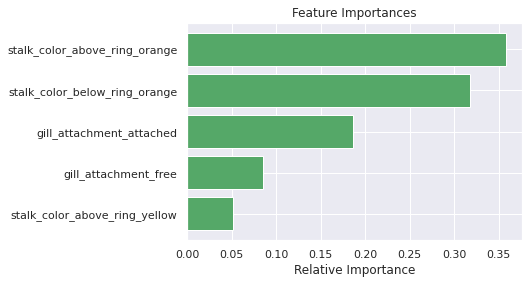

In [ ]:
print(tuned_model01.feature_importances_)
importances = tuned_model01.feature_importances_
indices = np.argsort(importances)
features = X_train_model01.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Results:**

From the plot above, we can see that the most important feature to predict the veil color of the mushroom is the 'orange stalk color above ring'. Next is 'orange stalk color below ring'. 

### 2. Visualize a Single Decision Tree

We can actually examine any of the trees in the forest. We'll select one tree and save the whole tree as an image.

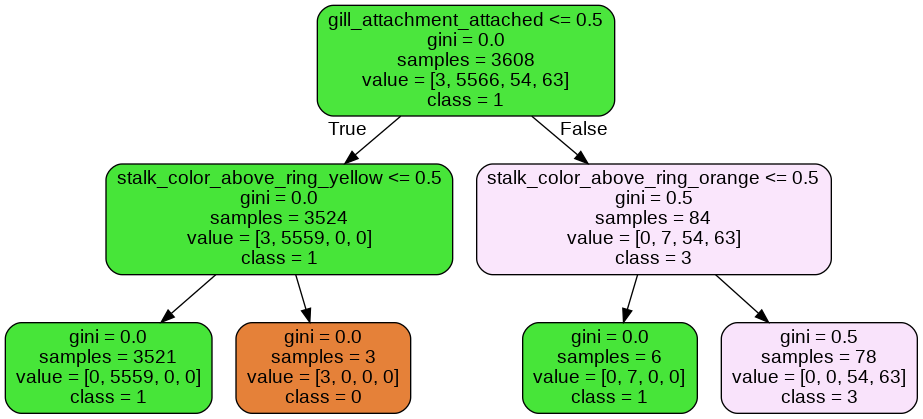

In [ ]:
from IPython.display import Image  
from sklearn.datasets import load_iris
from sklearn import tree
import sys
import os   
import pydotplus 

# Saving feature names
feature_list = list(X_train_model01.columns)
feature_list

# Pull out one tree from the forest
tree_small = tuned_model01.estimators_[5]

# Create DOT data
dot_data = tree.export_graphviz(tree_small, out_file=None, 
                         feature_names=feature_list,   
                         filled=True, rounded=True, precision = 1,class_names=['0','1','2','3'])  

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [ ]:
# pull the first row
df_final[['gill_attachment_attached','gill_attachment_free','stalk_color_above_ring_orange',
         'stalk_color_above_ring_yellow','stalk_color_below_ring_orange','veil_color']].head(1)

,gill_attachment_attached,gill_attachment_free,stalk_color_above_ring_orange,stalk_color_above_ring_yellow,stalk_color_below_ring_orange,veil_color
0,0,1,0,0,0,1


**Findings:**
Based solely on this tree, we can make a prediction for any new data point. Let’s take an example of making a prediction for the first row which is not gill_attachment_attached, not stalk_color_above_ring_orange, not stalk_color_above_ring_yellow, not stalk_color_below_ring_orange, but is gill_attachment_free (shown above). The actual class of the veil color for this observation is white.

We start at the root node and the first answer is True because gill_attachment_attached ≤ 0.5. We move to the left and encounter the second question, which is also True as stalk_color_above_ring_yellow ≤ 0.5. Move down to the left and we conclude that our estimate for the veil color is class=1 (white) as indicated by the value in the leaf node. Therefore, the model correctly predicted the veil color (white) for this observation.
